# Recommender Systems with Python

### Content-based recommender system
#### MovieLens dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
column_names=['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('u.data', sep='\t', names=column_names)
#df.head()

In [17]:
movie_titles=pd.read_csv('Movie_Id_Titles')
#movie_titles.head()

In [18]:
df=pd.merge(df, movie_titles, on='item_id')


In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Best rated movie titles?

In [26]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

Most rated movies in the data frame?

In [25]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [41]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.sort_values(by='rating', ascending=False, inplace=True)

In [44]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values(by=['num of ratings','rating'], ascending=False, inplace=True)
ratings.head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

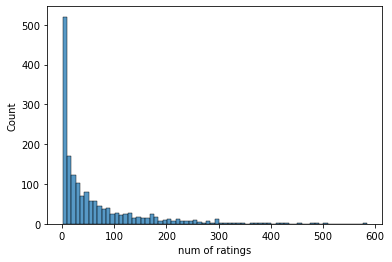

In [95]:
sns.histplot(ratings['num of ratings'], bins=70)

Histogram of "num of ratings" bellow

<AxesSubplot:xlabel='rating', ylabel='Count'>

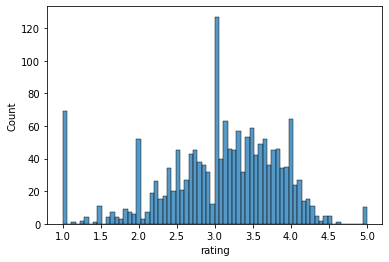

In [51]:
sns.histplot(ratings['rating'], bins=70)

Most of the movies have few ratings

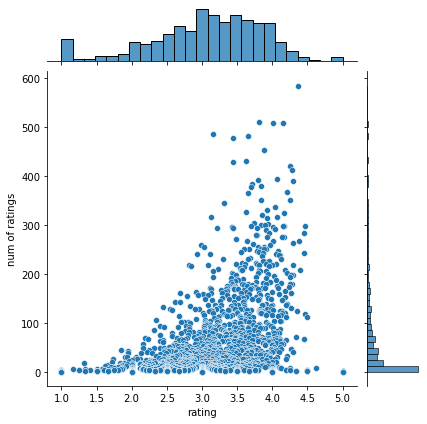

In [53]:
sns.jointplot(x='rating', y="num of ratings", data=ratings)

More reviews and rating have a possitive relationship with more number of ratings

In [108]:
movie_matrix=df.pivot_table(index='user_id', columns='title', values='rating')

In [65]:
starwars_user_rating=movie_matrix['Star Wars (1977)']
liarliar_user_rating=movie_matrix['Liar Liar (1997)']

In [71]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_rating)
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_rating)

c:\Users\dibajs1\Miniconda3\envs\Voi_practice\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\dibajs1\Miniconda3\envs\Voi_practice\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\dibajs1\Miniconda3\envs\Voi_practice\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\dibajs1\Miniconda3\envs\Voi_practice\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Similar movies to Star war (1977)

In [105]:
corr_starwars=pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.sort_values('Correlation', ascending=False, inplace=True)

In [106]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [107]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Similar movies with Liar Liar (1997)

In [102]:
corr_liarliar=pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [103]:
corr_liarliar=corr_liarliar.join(ratings['num of ratings'])

In [104]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
